In [1]:
import sys
import os

# If your notebook is in the same directory as the 'data_collector' module, you can use:
# root_path = os.getcwd()

# If you need to go up one directory from the notebook's location, you can use:
root_path = os.path.dirname(os.getcwd())

sys.path.append(root_path)

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns

from data_collection.data_collector import DataCollector


In [21]:
dc = DataCollector('serie_a')
df = dc.collect_data(year_start=2020, year_end=2023, write_csv=False)
# sample output

df.head()

Fetching data: 100%|███████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.32it/s]


,game_id,Div,Time,HomeTeam,AwayTeam,TG,FTHG,FTAG,FTR,HTHG,...,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season,city_name,lat,lon
0,fed9fd9d,serie_a,17:00,Fiorentina,Torino,1,1,0,H,0,...,1.84,2.10,1.87,2.10,1.84,2.03,nan/nan,Firenze,43.769871,11.255576
1,f6e317bf,serie_a,19:45,Verona,Roma,0,0,0,D,0,...,1.91,2.01,1.95,2.07,1.88,1.99,nan/nan,Verona,45.438496,10.992412
2,4b2f7ecb,serie_a,11:30,Parma,Napoli,2,0,2,A,0,...,2.15,1.79,2.18,1.86,2.09,1.79,nan/nan,Parma,44.801368,10.328083
3,13ba8a8b,serie_a,14:00,Genoa,Crotone,5,4,1,H,3,...,2.15,1.80,2.16,1.84,2.10,1.79,nan/nan,Genova,44.407260,8.933862
4,a67bf441,serie_a,17:00,Sassuolo,Cagliari,2,1,1,D,0,...,1.84,2.10,1.89,2.14,1.83,2.04,nan/nan,Sassuolo,44.540977,10.782902


In [22]:
df['Date'].dt.year.unique()

KeyError: 'Date'

# Summary Metrics by Team

In [4]:
teams_stats = dc.compute_team_statistics(df, 2003, 2023)
teams_stats.sort_values('WinRatio', ascending=False)


,HomeTeam,HomeGames,HomeWins,HomeDraws,HomeGoals,AwayGames,AwayWins,AwayDraws,AwayGoals,TotalGames,TotalWins,TotalDraws,TotalGoals,WinRatio,DrawRatio,HomeWinRatio,AwayWinRatio,HomeGoalRatio,AwayGoalRatio,TotalGoalRatio
5,Chelsea,57,47,7,134.0,57,34,12,95.0,114,81,19,229.0,0.710526,0.166667,0.824561,0.596491,2.350877,1.666667,2.008772
12,Man City,57,42,11,144.0,57,32,10,121.0,114,74,21,265.0,0.649123,0.184211,0.736842,0.561404,2.526316,2.122807,2.324561
0,Arsenal,57,39,13,116.0,57,30,9,100.0,114,69,22,216.0,0.605263,0.192982,0.684211,0.526316,2.035088,1.754386,1.894737
22,Tottenham,57,38,8,108.0,57,28,13,91.0,114,66,21,199.0,0.578947,0.184211,0.666667,0.491228,1.894737,1.596491,1.745614
11,Liverpool,57,38,11,128.0,57,28,13,103.0,114,66,24,231.0,0.578947,0.210526,0.666667,0.491228,2.245614,1.807018,2.026316
13,Man United,57,31,15,96.0,57,26,17,84.0,114,57,32,180.0,0.500000,0.280702,0.543860,0.456140,1.684211,1.473684,1.578947
7,Everton,57,33,14,107.0,57,17,16,64.0,114,50,30,171.0,0.438596,0.263158,0.578947,0.298246,1.877193,1.122807,1.500000
18,Southampton,57,25,16,86.0,57,20,11,63.0,114,45,27,149.0,0.394737,0.236842,0.438596,0.350877,1.508772,1.105263,1.307018
21,Swansea,57,23,13,87.0,57,16,9,58.0,114,39,22,145.0,0.342105,0.192982,0.403509,0.280702,1.526316,1.017544,1.271930
19,Stoke,57,27,15,83.0,57,12,16,51.0,114,39,31,134.0,0.342105,0.271930,0.473684,0.210526,1.456140,0.894737,1.175439


## Distributions

In [5]:
df.head()

,game_id,Div,Date,HomeTeam,AwayTeam,TG,FTHG,FTAG,FTR,HTHG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season
0,68eee0c6,epl,2013-08-17,Arsenal,Aston Villa,4.0,1.0,3.0,A,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013/2014
1,39863450,epl,2013-08-17,Liverpool,Stoke,1.0,1.0,0.0,H,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013/2014
2,ccd6ac8e,epl,2013-08-17,Norwich,Everton,4.0,2.0,2.0,D,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013/2014
3,0ccd2f86,epl,2013-08-17,Sunderland,Fulham,1.0,0.0,1.0,A,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013/2014
4,adaf7f76,epl,2013-08-17,Swansea,Man United,5.0,1.0,4.0,A,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013/2014


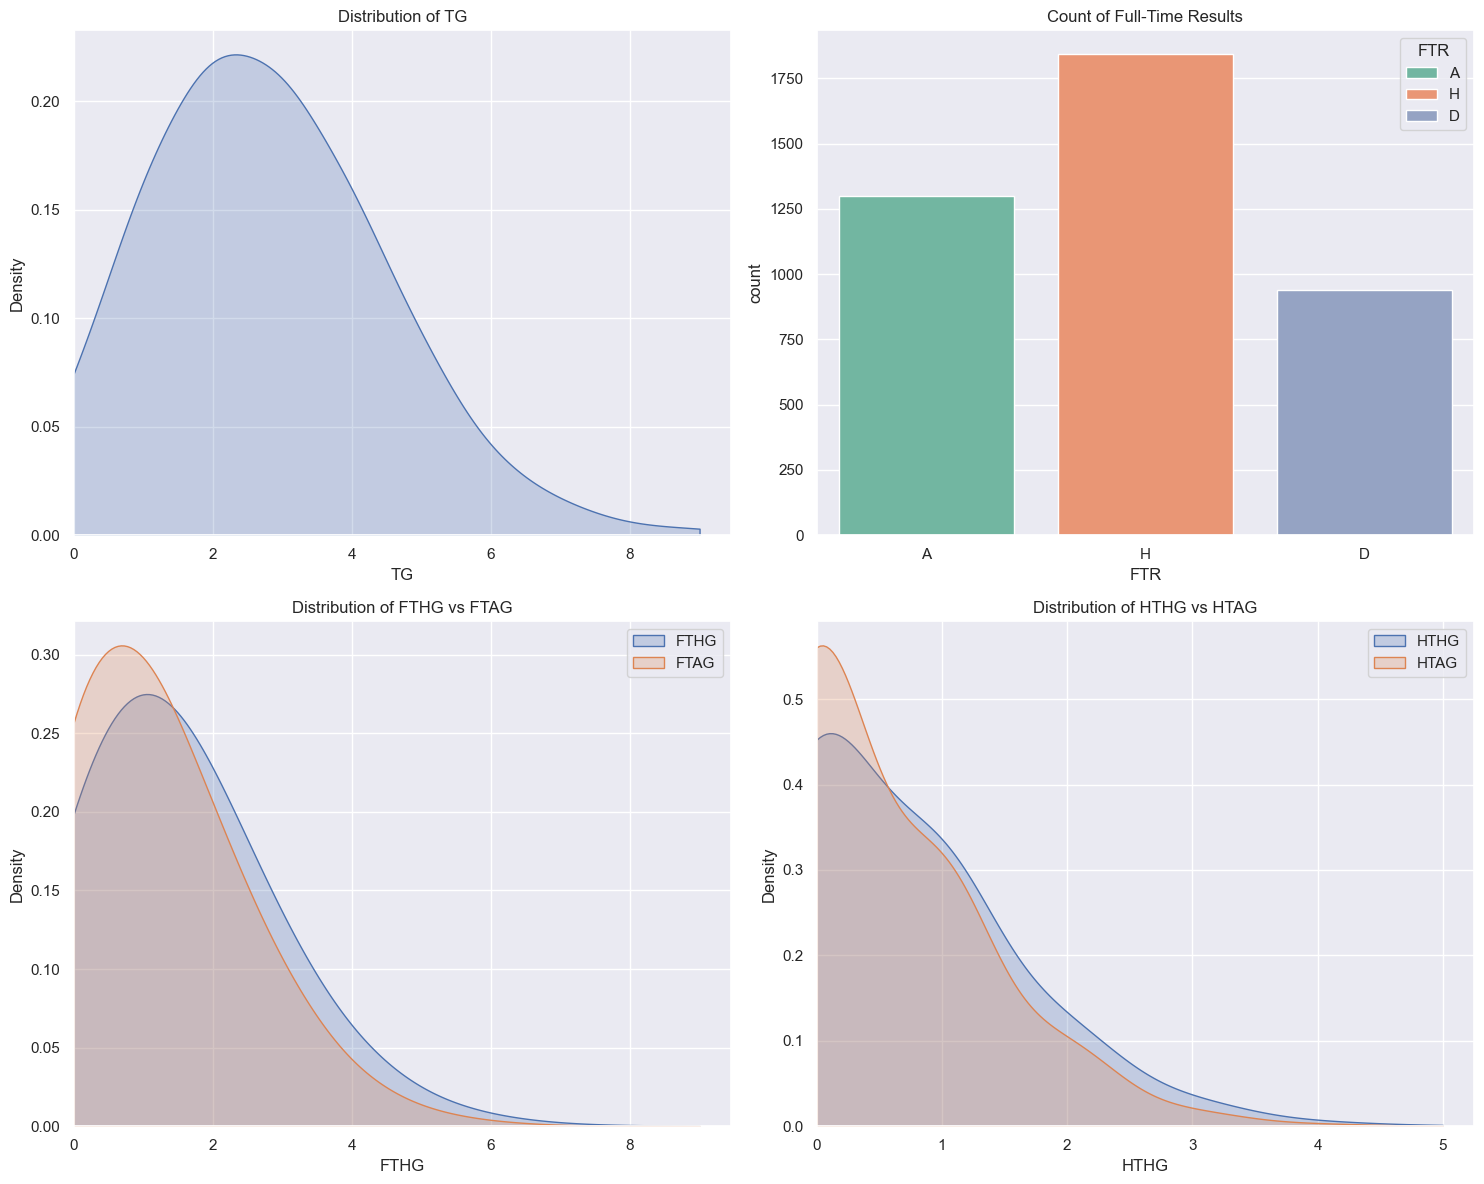

In [6]:
sns.set_theme()

f, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjusted figsize for better visibility

# KDE plot for 'TG'
sns.kdeplot(data=df, x='TG', cut=0, bw_adjust=2, ax=axes[0, 0], fill=True)
axes[0, 0].set_xlim(left=0)
axes[0, 0].set_title('Distribution of TG')

# Count plot for 'FTR'
sns.countplot(data=df, x='FTR', hue='FTR', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Count of Full-Time Results')


sns.kdeplot(data=df, x='FTHG', ax=axes[1, 0], cut=0, bw_adjust=3, fill=True, label='FTHG')
sns.kdeplot(data=df, x='FTAG', ax=axes[1, 0], cut=0, bw_adjust=3, fill=True, label='FTAG')
axes[1, 0].set_xlim(left=0)
axes[1, 0].set_title('Distribution of FTHG vs FTAG')
axes[1, 0].legend()

sns.kdeplot(data=df, x='HTHG', ax=axes[1, 1], cut=0, bw_adjust=3, fill=True, label='HTHG')
sns.kdeplot(data=df, x='HTAG', ax=axes[1, 1], cut=0, bw_adjust=3, fill=True, label='HTAG')
axes[1, 1].set_xlim(left=0)
axes[1, 1].set_title('Distribution of HTHG vs HTAG')
axes[1, 1].legend()


# You can add another plot in axes[1, 1] as needed

plt.tight_layout()
plt.show()

<Axes: xlabel='HomeTeam', ylabel='TG'>

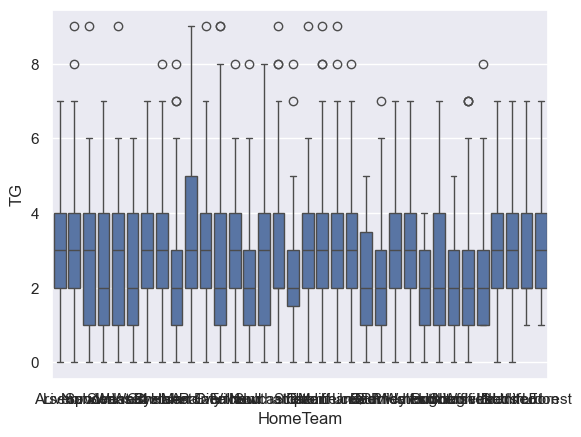

In [7]:
sns.boxplot(x=df['HomeTeam'], y=df['TG'])

## Weather Data

In [8]:
weather = pd.read_csv("/Users/admin/git_projects/football/data_collection/weather_test.csv")
weather.head()

/var/folders/cz/tsrtpglj4x3fc4dskw2pnjrc0000gn/T/ipykernel_59633/2066723148.py:1: DtypeWarning: Columns (49,95) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("/Users/admin/git_projects/football/data_collection/weather_test.csv")


,game_id,Div,Date,HomeTeam,TG,AwayTeam,FTHG,FTAG,FTR,HTHG,...,humidity,dew,precip,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,conditions
0,9756db2e,serie_a,2003-08-30,Reggina,4.0,Sampdoria,2.0,2.0,D,2.0,...,37.49,21.1,0.0,29.5,360.0,1012.9,10.0,NaN,NaN,Clear
1,e4604038,serie_a,2003-08-31,Bologna,4.0,Parma,2.0,2.0,D,1.0,...,22.71,8.1,0.0,31.3,230.0,1007.1,11.0,50.2,NaN,Partially cloudy
2,e4be3e26,serie_a,2003-08-31,Brescia,2.0,Chievo,1.0,1.0,D,0.0,...,29.58,9.6,0.0,12.4,248.0,1007.1,11.0,49.6,NaN,Partially cloudy
3,22af961b,serie_a,2003-08-31,Inter,2.0,Modena,2.0,0.0,H,0.0,...,29.70,11.0,0.0,24.9,326.0,1007.2,11.0,30.5,NaN,Partially cloudy
4,e6bf6b52,serie_a,2003-08-31,Juventus,6.0,Empoli,5.0,1.0,H,1.0,...,24.55,2.1,0.0,14.1,354.0,1010.2,10.1,30.0,NaN,Partially cloudy


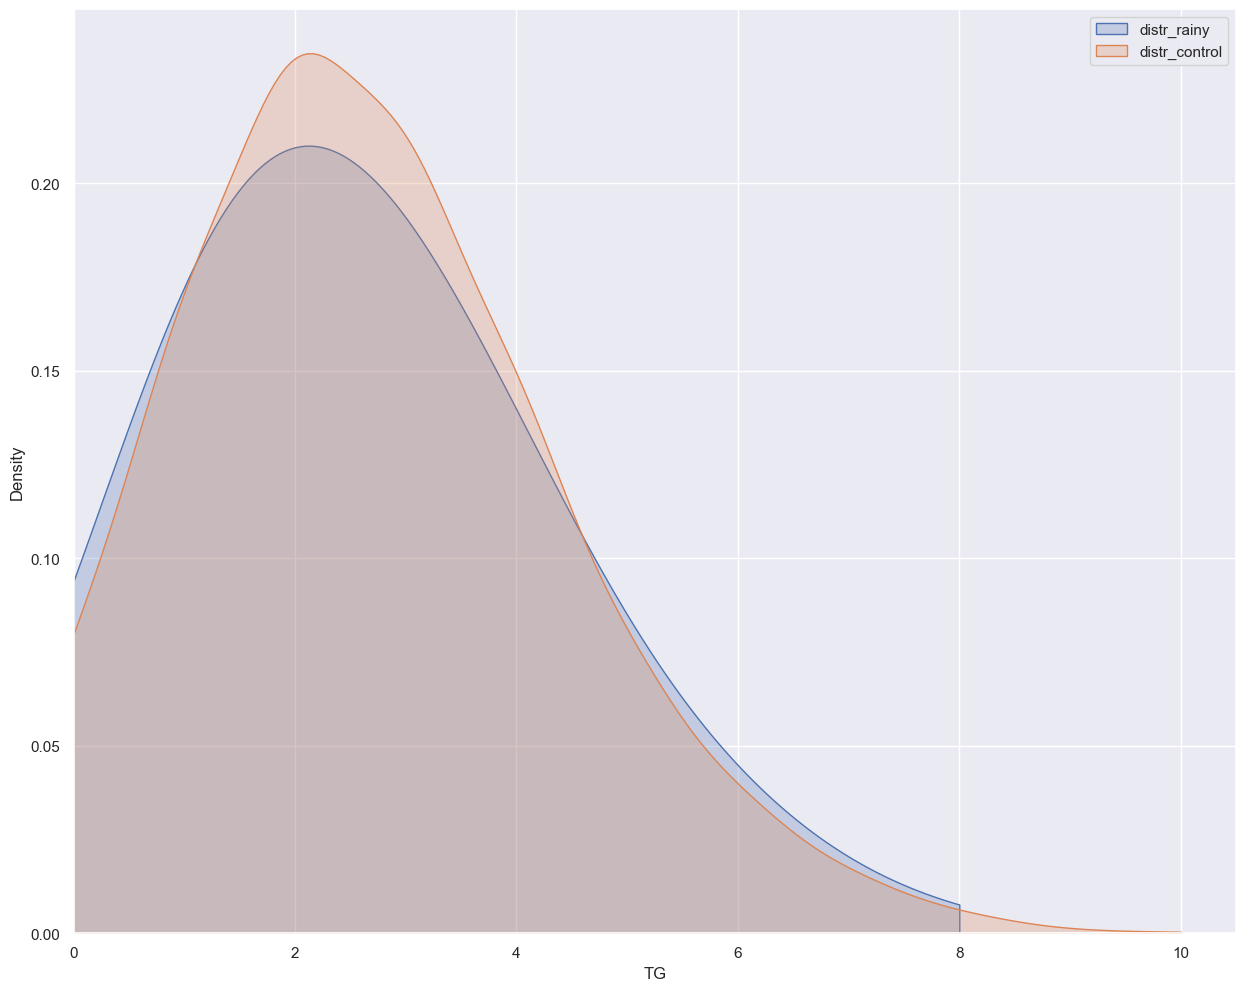

In [9]:
f, ax = plt.subplots(1, 1, figsize=(15, 12)) 

sns.kdeplot(data=weather.query("precip > 0.5"), x='TG', cut=0, bw_adjust=2, ax=ax, fill=True, label='distr_rainy')
sns.kdeplot(data=weather, x='TG', cut=0, bw_adjust=2, ax=ax, fill=True, label='distr_control')
ax.set_xlim(left=0)
ax.legend()




In [10]:
# Linear Regression of TG on weather components
weather_mdl = weather.dropna(subset=['temp', 'feelslike', 'humidity', 'dew', 'precip', 'windspeed',
       'winddir', 'pressure', 'visibility', 'cloudcover'])
x = weather_mdl.iloc[:, 157:-2]
y = weather_mdl.iloc[:, 4]

model = sm.OLS(y, x)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     TG   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.724
Method:                 Least Squares   F-statistic:                              1902.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:50:19   Log-Likelihood:                         -13969.
No. Observations:                7250   AIC:                                  2.796e+04
Df Residuals:                    7240   BIC:                                  2.803e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.0462      0.029      1.569      0.117      -0.012       0.104
feelslike     -0.0269      0.024     -1.142      0.254      -0.073       0.019
humidity       0.0051      0.005      1.062      0.288      -0.004       0.014
dew           -0.0051      0.018     -0.282      0.778      -0.041       0.031
precip        -0.0151      0.010     -1.468      0.142      -0.035       0.005
windspeed     -0.0019      0.003     -0.742      0.458      -0.007       0.003
winddir        0.0002      0.000      0.834      0.404      -0.000       0.001
pressure       0.0021      0.000      5.050      0.000       0.001       0.003
visibility    -0.0031      0.003     -0.932      0.351      -0.010       0.003
cloudcover    -0.0007      0.001     -0.871      0.384      -0.002       0.001
==============================================================================
Omnibus:                      368.022   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.850
Skew:                           0.581   Prob(JB):                     5.56e-93
Kurtosis:                       3.234   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## K-Means

In [11]:
features = ['TG','FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HHW','temp','humidity', 'precip', 'windspeed']
scaler = StandardScaler()

clust = weather[features].dropna()
scaler.fit(clust)
clust_scaled = scaler.fit_transform(clust)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clust_scaled)
clust['cluster'] = clusters

KeyError: "['HHW'] not in index"

In [ ]:
clust

In [ ]:
clust_means = (
    clust.groupby('cluster')
    .mean()
)

clust_medians = (
    clust.groupby('cluster')
    .median()
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='TG', data=clust)
plt.title('Boxplot of Full-Time Home Goals (FTHG) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Full-Time Goals (TG)')

In [ ]:
clust_medians

## XGBoost

In [ ]:
features = ['FTR','TG','FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HHW','temp','humidity', 'precip', 'windspeed']


X = clust.drop(columns=['FTR', 'FTHG', 'FTAG'])  # Exclude target and non-relevant features
y = clust['FTR']  # Target variable

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=3, seed=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

In [ ]:
df.columns.get_loc('HST')